In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# load model 
model = tf.keras.models.load_model('./models/object_detection.h5')
print('Model loaded successfully.')

Model loaded successfully.


In [4]:
path = './test_images/t01.JPG'
image = load_img(path) # PIL object
image = np.array(image, dtype = np.uint8) # 8 bit array (0, 255)
image1 = load_img(path, target_size = (224, 224))
image_arr_224 = img_to_array(image1) / 255.0 # convert into array and normalize

In [5]:
# size of original image
h, w, d = image.shape

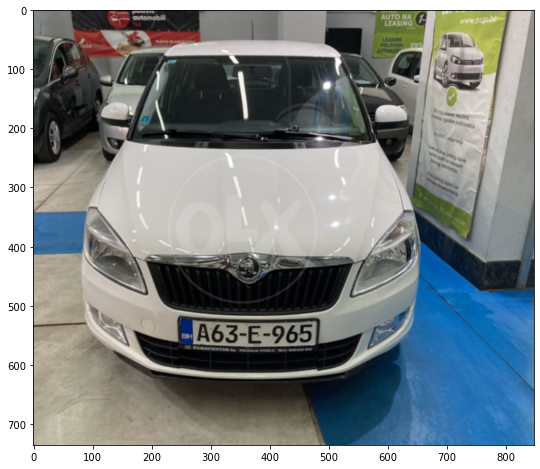

In [6]:
plt.figure(figsize = (10, 8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1, 224, 224, 3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
# make predictions
coords = model.predict(test_arr)
coords

array([[0.36756313, 0.5534751 , 0.708184  , 0.7886572 ]], dtype=float32)

In [10]:
# denormalize the values
denorm = np.array([w, w, h, h])
coords = coords * denorm
# coords = coords.astype(np.int32)
coords

array([[311.32596982, 468.79339439, 521.22342682, 580.45169067]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[311, 468, 521, 580]])

In [12]:
# draw
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)
pt1, pt2

((311, 521), (468, 580))

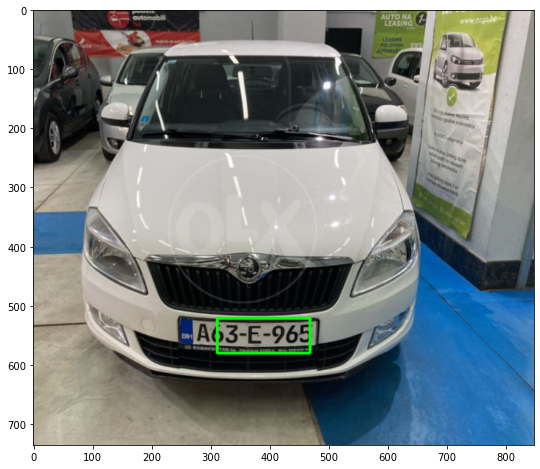

In [13]:
cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)
plt.figure(figsize = (10, 8))
plt.imshow(image)
plt.show()

In [14]:
# create pipeline
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image, dtype = np.uint8) # 8 bit array (0, 255)
    image1 = load_img(path, target_size = (224, 224))
    # data preprocessing
    image_arr_224 = img_to_array(image1) / 255.0 # convert into array and normalize
    h, w, d = image.shape
    test_arr = image_arr_224.reshape(1, 224, 224, 3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w, w, h, h])
    coords = coords * denorm
    # coords = coords.astype(np.int32)
    coords = coords.astype(np.int32)
    # draw
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    pt1, pt2
    cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)
    return image, coords

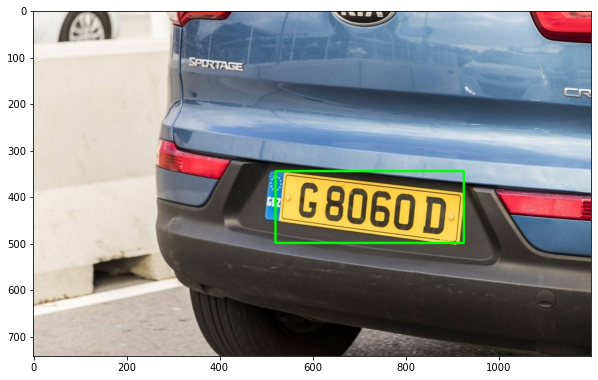

In [15]:
path = './test_images/t06.jpg'
image, coords = object_detection(path)
plt.figure(figsize = (10, 8))
plt.imshow(image)
plt.show()

In [16]:
import pytesseract as pt

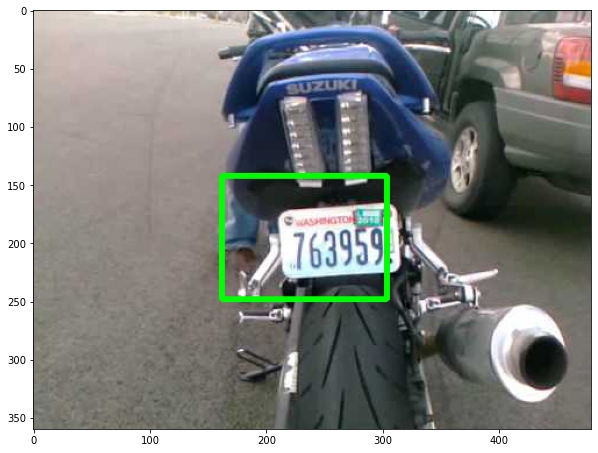

In [17]:
# optical character recognition
path = './test_images/t05.jpg'
image, coords = object_detection(path)
plt.figure(figsize = (10, 8))
plt.imshow(image)
plt.show()

In [18]:
img = np.array(load_img(path))
xmin, xmax, ymin, ymax = coords[0]
roi = img[ymin:ymax, xmin:xmax]

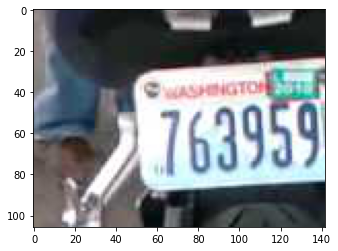

In [19]:
plt.imshow(roi)
plt.show()

In [20]:
# extract text from image
lp_text = pt.image_to_string(lp_image)

NameError: name 'lp_image' is not defined